# 2. Lattices and Crystal Structures

## 2.1 Lattices

Lattices are a mathematical concept that is created by gathering all the permutations of basis vectors. One can look at a lattice as a tiling of some object. Lattices can exist in one, two, or three dimensions. To represent a lattice in n dimensions one needs n basis vectors. The basis vectors are often referred to as translational vectors. Lattices in 1D, 2D, and 3D are called line, plane, and, space lattices respectively. The following figures show a line lattice and a plane lattice represented by basis vectors $\vec{a}$ and $\vec{b}(\vec{b}\nparallel\vec{a})$.

![title](https://image.slidesharecdn.com/972b3102005cullitychapter2-090427075953-phpapp01/95/972-b3102005-cullity-chapter-2-2-728.jpg?cb=1240819335)

If we introduce another vector $\vec{c}$ not co-planar to $\vec{a}$ and $\vec{b}$, we can create a space lattice. The typical definition of this vector is that is has to follow the so called, right hand rule, which means that $\vec{c} = \vec{a} \times \vec{b}$. 

![title](https://image.slidesharecdn.com/972b3102005cullitychapter2-090427075953-phpapp01/95/972-b3102005-cullity-chapter-2-3-728.jpg?cb=1240819335)

There are three useful concepts in lattices, Lattice Point, Lattice Lines, and Lattice Planes. The following is a brief explanation and conventions of writing definitions. The examples will be on space lattices. All of these concepts are defined with respect to an origin of the lattic.

### 2.1.1 Lattice Points

Every lattice point can be defined by the vector $\tau = u\vec{a}+v\vec{b}+w\vec{c}$. Most often $u$, $v$, $w$ are integers. As a convention lattice points are written as a triple $uvw$.The following shows the lattice points in two dimensions. Negative numbers are represented by bar.

![title](http://pd.chem.ucl.ac.uk/pdnn/diff1/lattice.gif)

### 2.1.2 Lattice Lines

In Euclidean geometry, a line is defined by two lattice points. In a lattice, however, a line also defines all of the parallel lines to that line with the same lattice parameter (i.e. distance between two adjacent points on the are the same). Usually, lattice lines are represented with $[uvw]$ in a bracket (*e.g.* [1 2 5]).

![title](https://www.oreilly.com/library/view/engineering-physics/9788131775073/images/c03f001.png)

### 2.1.3 Lattice Planes

If we consider a plane intersecting the axes $x$, $y$, and $z$ at points m00, 0n0, and 00p. We define that plane as a triple in prantheses $(hkl)$, where $h$,$k$, and $l$ are chosen by multiplying the the least comomn multiplier of $m$, $n$, and $p$ with the reciprocal intercepts form $\frac{1}{m}$, $\frac{1}{n}$, and $\frac{1}{p}$. 

![title](https://ars.els-cdn.com/content/image/3-s2.0-B9780123970145000055-b05-01-9780123970145.jpg?_)

A very useful concept in crystallography is the miller index. To better define the miller indices we need to introduce the reciprocal lattice. 

## 2.2 Reciprocal Lattice

Reciprocal lattice is the Fourier transform of another lattice. A reciprocal lattice has every property that we have defined in this chapter. To derive the reciprocal lattice of a lattice defined by lattice vectors a, b, and c, one has to simply follow the following formulas.  

$\textbf{a}^\ast = \frac{2\pi}{\textbf{a}.(\textbf{b} \times \textbf{c})}\textbf{b} \times \textbf{c}$

$\textbf{b}^\ast = \frac{2\pi}{\textbf{a}.(\textbf{b} \times \textbf{c})}\textbf{c} \times \textbf{a}$

$\textbf{c}^\ast = \frac{2\pi}{\textbf{a}.(\textbf{b} \times \textbf{c})}\textbf{a} \times \textbf{b}$

Any vector in the reciprocal lattice can be defined using these vectors. 


This cell parameters as usually defined by two different but consistent methods.

+ Each one of the cell parameter, $\textbf{a}$, $\textbf{b}$, $\textbf{c}$ is defined as a vector in cartesian coordinates.

+ As the magnitude of each vector, $a$, $b$, $c$ and the corresponding angles between them, as in the following figure

In [118]:
import numpy as np
from numpy import *
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from mpl_toolkits.mplot3d import proj3d
import ipywidgets as widgets

In [131]:
#The following class has been modified from ase
class Crystalcell():
    
    def __init__(self):
        return
    
    def unit_vector(self, x):
        """Return a unit vector in the same direction as x."""
        y = np.array(x, dtype='float')
        return y / np.linalg.norm(y)

    def angle(self, x, y):
        """Return the angle between vectors a and b in degrees."""
        return arccos(np.dot(x, y) / (np.linalg.norm(x) * np.linalg.norm(y))) * 180. / pi

    def cell_to_cellpar(self, cell, radians=False):
        """Returns the cell parameters [a, b, c, alpha, beta, gamma]."""
        lengths = [np.linalg.norm(v) for v in cell]
        angles = []
        for i in range(3):
            j = i - 1
            k = i - 2
            ll = lengths[j] * lengths[k]
            if ll > 1e-16:
                x = np.dot(cell[j], cell[k]) / ll
                angle = 180.0 / pi * arccos(x)
            else:
                angle = 90.0
            angles.append(angle)
        return np.array(lengths + angles)


    def cellpar_to_cell(self, cellpar, ab_normal=(0, 0, 1), a_direction=None):
        """Return a 3x3 cell matrix from cellpar=[a,b,c,alpha,beta,gamma].

        Angles must be in degrees.

        The returned cell is orientated such that a and b
        are normal to `ab_normal` and a is parallel to the projection of
        `a_direction` in the a-b plane.

        Default `a_direction` is (1,0,0), unless this is parallel to
        `ab_normal`, in which case default `a_direction` is (0,0,1).

        The returned cell has the vectors va, vb and vc along the rows. The
        cell will be oriented such that va and vb are normal to `ab_normal`
        and va will be along the projection of `a_direction` onto the a-b
        plane.

        Example:

        >>> cell = cellpar_to_cell([1, 2, 4, 10, 20, 30], (0, 1, 1),(1,2,3))
        >>> np.round(cell, 3)
        array([[ 0.816, -0.408,  0.408],
               [ 1.992, -0.13 ,  0.13 ],
               [ 3.859, -0.745,  0.745]])

        """
        if a_direction is None:
            if np.linalg.norm(np.cross(ab_normal, (1, 0, 0))) < 1e-5:
                a_direction = (0, 0, 1)
            else:
                a_direction = (1, 0, 0)
        
        # Define rotated X,Y,Z-system, with Z along ab_normal and X along
        # the projection of a_direction onto the normal plane of Z.
        ad = np.array(a_direction)
        Z = self.unit_vector(ab_normal)
        X = self.unit_vector(ad - dot(ad, Z) * Z)
        Y = np.cross(Z, X)

        # Express va, vb and vc in the X,Y,Z-system
        alpha, beta, gamma = 90., 90., 90.
        if isinstance(cellpar, (int, float)):
            a = b = c = cellpar
        elif len(cellpar) == 1:
            a = b = c = cellpar[0]
        elif len(cellpar) == 3:
            a, b, c = cellpar
        else:
            a, b, c, alpha, beta, gamma = cellpar

        # Handle orthorhombic cells separately to avoid rounding errors
        eps = 2 * np.spacing(90.0, dtype=np.float64)  # around 1.4e-14
        # alpha
        if abs(abs(alpha) - 90) < eps:
            cos_alpha = 0.0
        else:
            cos_alpha = cos(alpha * pi / 180.0)
        # beta
        if abs(abs(beta) - 90) < eps:
            cos_beta = 0.0
        else:
            cos_beta = cos(beta * pi / 180.0)
        # gamma
        if abs(gamma - 90) < eps:
            cos_gamma = 0.0
            sin_gamma = 1.0
        elif abs(gamma + 90) < eps:
            cos_gamma = 0.0
            sin_gamma = -1.0
        else:
            cos_gamma = cos(gamma * pi / 180.0)
            sin_gamma = sin(gamma * pi / 180.0)

        # Build the cell vectors
        va = a * np.array([1, 0, 0])
        vb = b * np.array([cos_gamma, sin_gamma, 0])
        cx = cos_beta
        cy = (cos_alpha - cos_beta * cos_gamma) / sin_gamma
        cz_sqr = 1. - cx * cx - cy * cy
        assert cz_sqr >= 0
        cz = sqrt(cz_sqr)
        vc = c * np.array([cx, cy, cz])

        # Convert to the Cartesian x,y,z-system
        abc = np.vstack((va, vb, vc))
        T = np.vstack((X, Y, Z))
        cell = np.dot(abc, T)

        return cell

    def metric_from_cell(self, cell):
        """Calculates the metric matrix from cell, which is given in the
        Cartesian system."""
        cell = np.asarray(cell, dtype=float)
        return np.dot(cell, cell.T)
    
    def vol_cell(self, cell):
        """Calculates the metric matrix from cell, which is given in the
        Cartesian system."""
        vol=np.dot(cell[0,:],np.cross(cell[1,:],cell[2,:]))
        return vol

    def crystal_structure_from_cell(self, cell, eps=2e-4, niggli_reduce=True):
        """Return the crystal structure as a string calculated from the cell.

        Supply a cell (from atoms.get_cell()) and get a string representing
        the crystal structure returned. Works exactly the opposite
        way as ase.dft.kpoints.get_special_points().

        Parameters:

        cell : numpy.array or list
            An array like atoms.get_cell()

        Returns:

        crystal structure : str
            'cubic', 'fcc', 'bcc', 'tetragonal', 'orthorhombic',
            'hexagonal' or 'monoclinic'
        """
        cellpar = self.cell_to_cellpar(cell)
        abc = cellpar[:3]
        angles = cellpar[3:] / 180 * pi
        a, b, c = abc
        alpha, beta, gamma = angles

        if abc.ptp() < eps and abs(angles - pi / 2).max() < eps:
            return 'cubic'
        elif abc.ptp() < eps and abs(angles - pi / 3).max() < eps:
            return 'fcc'
        elif abc.ptp() < eps and abs(angles - np.arccos(-1 / 3)).max() < eps:
            return 'bcc'
        elif abs(a - b) < eps and abs(angles - pi / 2).max() < eps:
            return 'tetragonal'
        elif abs(angles - pi / 2).max() < eps:
            return 'orthorhombic'
        elif (abs(a - b) < eps and
              (abs(gamma - pi / 3 * 2) < eps or abs(gamma - pi / 3) < eps) and
              abs(angles[:2] - pi / 2).max() < eps):
            return 'hexagonal'
        elif (abs(angles - pi / 2) > eps).sum() == 1:
            return 'monoclinic'
        elif (abc.ptp() < eps and angles.ptp() < eps and
              np.abs(angles).max() < pi / 2):
            return 'rhombohedral type 1'
        elif (abc.ptp() < eps and angles.ptp() < eps and
              np.abs(angles).max() > pi / 2):
            return 'rhombohedral type 2'
        else:
            raise ValueError('Cannot find crystal structure')

In [144]:
@widgets.interact_manual(a=(0.1,10.0),b=(0.1,10.0),c=(0.1,10.0), \
                        alpha=(0,140),beta=(0,140),gamma=(0,140),lw=(1., 10.))

def plot(a=1,b=1,c=1,alpha=90,beta=90,gamma=90, lw=2):
    cell=Crystalcell()
    cellpar=cell.cellpar_to_cell([a,b,c,alpha,beta,gamma],(0, 1, 1),(1,2,3))
    
    fig = plt.figure(figsize=(15,15))
    
    
    ax = fig.add_subplot(211, projection='3d')

    a=cellpar[0,:]
    b=cellpar[1,:]
    c=cellpar[2,:]
    
    xyz=np.array([[0,0,0],a,b,c,a+b,a+c,b+c,a+b+c])
    xyz=xyz.T
    x = xyz[0,:] 
    y = xyz[1,:]
    z = xyz[2,:] 

    vertices = [[0, 1, 4, 2], [0, 1, 5, 3], [1,5,7,4], [2,4,7,6], [0,2,6,3]] 

    tupleList = list(zip(x, y, z)) 

    poly3d = [[tupleList[vertices[ix][iy]] for iy in range(len(vertices[0]))] for ix in range(len(vertices))] 
    ax.scatter(x,y,z) 
    ax.add_collection3d(Poly3DCollection(poly3d, facecolors='w', linewidths=4, alpha=0.5)) 
    ax.add_collection3d(Line3DCollection(poly3d, colors='k', linewidths=1, linestyles=':')) 
    ax.set_title("Cell parameters in Real Space")
    
    vol=cell.vol_cell(cellpar)   
    arep=2*np.pi*np.cross(cellpar[1,:],cellpar[2,:])/vol
    brep=2*np.pi*np.cross(cellpar[2,:],cellpar[0,:])/vol
    crep=2*np.pi*np.cross(cellpar[0,:],cellpar[1,:])/vol
    
    ax = fig.add_subplot(212, projection='3d')
    
    xyz=np.array([[0,0,0],arep,brep,crep,arep+brep,arep+crep,brep+crep,arep+brep+crep])
    xyz=xyz.T
    x = xyz[0,:] 
    y = xyz[1,:]
    z = xyz[2,:] 

    vertices = [[0, 1, 4, 2], [0, 1, 5, 3], [1,5,7,4], [2,4,7,6], [0,2,6,3]] 

    tupleList = list(zip(x, y, z)) 

    poly3d = [[tupleList[vertices[ix][iy]] for iy in range(len(vertices[0]))] for ix in range(len(vertices))] 
    ax.scatter(x,y,z) 
    ax.add_collection3d(Poly3DCollection(poly3d, facecolors='w', linewidths=4, alpha=0.5)) 
    ax.add_collection3d(Line3DCollection(poly3d, colors='k', linewidths=1, linestyles=':')) 
    ax.set_title("Cell parameters in Reciprocal Space")
    
    plt.show()
    

interactive(children=(FloatSlider(value=1.0, description='a', max=10.0, min=0.1), FloatSlider(value=1.0, descr…

### 2.2.1 Miller index

Now that we have defined the reciprocal space, we can introduce the very useful concept of Miller indices. A plane can be used by the vector perpendicular to it. So we can use the reciprocal lattice vectors to define every plane possible in the lattice. In other words, the reciprocal vectors are used to define the planes in the real space.  The reason we have used a reciprocal lattice vector is that the real space lattice vectors can not be used to define all the planes in the real space. 

Imagine the reciprocal lattice vector $\textbf{g}_{hkl}$ defined as 

$\textbf{g}_{hkl}= h\textbf{a}^\ast + k\textbf{b}^\ast l\textbf{c}^\ast$ 
 
This vector can be used to define all the planes perpendicular to it. The miller index h, k, and l (hkl) represent all the planes perpendicular to $\textbf{g}_{hkl}$. 

## 2.3 Crystal Structures

A lattice is the best mathematical object to define a crystal structure. A crystal structure is created by combining a basis with a lattice. This means that the basis will be repeated in all of the points defining the lattice, creating periodic entities of the basis. In solid-state physics, we can use this concept to represent crystal structures. Using a suitable basis and lattice, we represent most of the crystal structures known to us. 
The following are examples of crystal structures defined by their basis and lattice. 

![title](https://cdn3.edurev.in/ApplicationImages/Temp/1611931_8eb5b11e-86fe-4219-83bf-592987dfc808_lg.PNG)

![title](https://nanohub.org/wiki/CrystalViewerPage/Image:diamond.jpg)

**In short, a lattice is a layout of points that gets repeated in all directions. A basis is any object (atoms, molecules, ions, etc.) that can be placed at the lattice points. The lattice and basis are all that is needed to describe an entire crystal.** 

Let's look at an example. We can use the WVU logo as our basis and insert it in a 2D lattice. You can choose the ratio of $\vec{a}$ to $\vec{b}$ by entering a length (0-4) for each. Run the code below to get started.

Cell parameter "a" = 3
Cell parameter "b" = 4


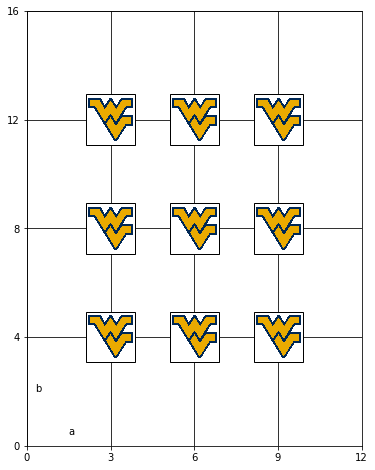

In [142]:
#Lattice Widget

import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import numpy as np

from matplotlib.offsetbox import (TextArea, DrawingArea, OffsetImage,
                                  AnnotationBbox)
from PIL import Image
import requests
from io import BytesIO

a = float(input('Cell parameter "a" = '))
b = float(input('Cell parameter "b" = '))

response = requests.get('https://github.com/romerogroup/CrystalCompanion/blob/master/WVU.png?raw=true')
img = Image.open(BytesIO(response.content))
imgsize = img.size
zum = 45/imgsize[0]

if b > a:
    fig = plt.figure(figsize=(6,6*b/a))
else:
    fig = plt.figure(figsize=(6*a/b,6))
    
fig_pixels = fig.get_size_inches()*fig.dpi

ax = plt.subplot(111)
ax.set_ylim([0,b*4])
ax.set_xlim([0,a*4])

#Add first image at the origin
imagebox = OffsetImage(img, zoom=zum)
imagebox.image.axes = ax

#Fill lattice with images
for i in np.arange(1,4):
    for j in np.arange(1,4):
        ab = AnnotationBbox(imagebox, (0,0),
                        xybox=(i*a,j*b),
                        xycoords='data',
                        boxcoords="data",
                        frameon = 'False',
                        pad=0.2)


        ax.add_artist(ab)
        
ax.annotate('a',(a/2,b/10))
ax.annotate('b',(a/10,b/2))

#Make gridlines for lattice
a_loc = plticker.MultipleLocator(base=a)
b_loc = plticker.MultipleLocator(base=b)
ax.xaxis.set_major_locator(a_loc)
ax.yaxis.set_major_locator(b_loc)
ax.grid(color='k')

plt.show()

## 